Notebook: italian_airbnb_superhost_linear_regression_exploration.ipynb
-----------------------------------------------------------
Title: Italian Airbnb Superhost Analysis – Linear Regression Exploration
-----------------------------------------------------------

##### Objective
The aim of this analysis is to identify factors that influence whether a host achieves top host status on Airbnb.  
Both simple and multiple linear regression approaches are used to explore relationships between host characteristics, listing features, and the likelihood of being a top host.

##### Introduction
This notebook explores the relationships between host and listing characteristics and the probability of being a top host.  
It includes data cleaning, exploratory visualization, linear regression modeling, and model evaluation.  
The approach combines interpretability with visual inspection to highlight predictive patterns and potential areas for further investigation.

##### -----------------------------------------------------------
#### Notes to Tutor:
##### -----------------------------------------------------------

This notebook demonstrates the methodology for modeling the probability of hosts being top hosts.  
It includes step-by-step visualizations, linear regression analyses (simple and multiple), and interpretations of model performance metrics.  
Explanations accompany each analytical step to facilitate understanding and reproducibility.


## 2. Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 3. Load the Airbnb Dataset

In [3]:
path = r'C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\Achievement 6\10-2025 Italian Airbnb'

In [6]:
df_airbnb = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'italian_airbnbs_cleaned.csv'))

## 4. Data Cleaning & Feature Selection

I selected the following columns for regression analysis:

- `rating_score` (simple regression predictor)
- Optional predictors for multiple regression:
    - `accuracy_score`, `cleanliness_score`, `checkin_score`, `communication_score`, `location_score`, `value_for_money_score`, `host_experience_years`
- Target variable: `is_top_host` (0 = No, 1 = Yes)


In [15]:
# Columns to keep
keep_cols = [
    'rating_score',
    'host_experience_years',
    'accuracy_score',
    'cleanliness_score',
    'checkin_score',
    'communication_score',
    'location_score',
    'value_for_money_score',
    'total_reviews',
    'reviews_per_month',
    'price',
    'log_price',
    'is_top_host' 
]

In [14]:
# Subset dataset
df_model = df_airbnb[keep_cols].copy()

## 5. Hypothesis

**Simple Regression Hypothesis:**  
Higher `rating_score` is associated with higher probability of being a superhost.  

**Multiple Regression Hypothesis (Bonus):**  
A combination of high scores across `accuracy`, `cleanliness`, `check-in`, `communication`, `location`, `value_for_money` and more experience increases the likelihood of being a superhost.

## 6. Exploratory Plot

Since `host_is_superhost` is binary (0/1), adding jitter to the y-axis makes it easier to visualize the linear trend.

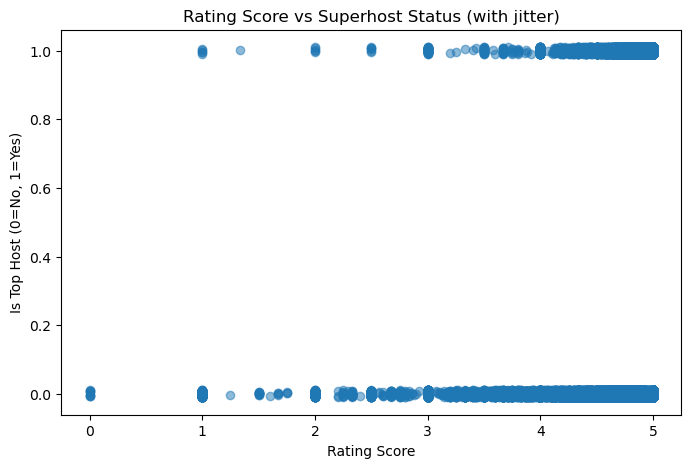

In [18]:
# Add jitter
np.random.seed(42)
jitter = np.random.uniform(-0.01, 0.01, size=df_model.shape[0])

plt.figure(figsize=(8,5))
plt.scatter(df_model['rating_score'], df_model['is_top_host'] + jitter, alpha=0.5)
plt.title("Rating Score vs Superhost Status (with jitter)")
plt.xlabel("Rating Score")
plt.ylabel("Is Top Host (0=No, 1=Yes)")
plt.show()

## 7. Simple Linear Regression

Predictor: `rating_score`  
Target: `is_top_host`

In [19]:
X = df_model['rating_score'].values.reshape(-1,1)
y = df_model['is_top_host'].values  

In [20]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict
y_pred = lr.predict(X_test)

## 8. Regression Line on Test Set

The scatterplot with the regression line allows visual inspection of the model fit.

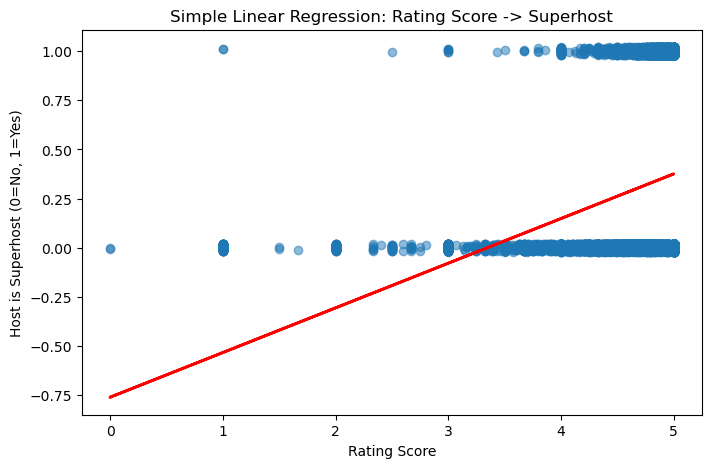

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test + np.random.uniform(-0.02,0.02,len(y_test)), alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title("Simple Linear Regression: Rating Score -> Superhost")
plt.xlabel("Rating Score")
plt.ylabel("Host is Superhost (0=No, 1=Yes)")
plt.show()

## 9. Model Performance

Check the mean squared error (MSE) and R² score to evaluate how well the model predicts superhost status.

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

MSE: 0.2038
R2 Score: 0.0526


In [25]:
# Compare predicted vs actual
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results.head()

,Actual,Predicted
0,0.0,0.282201
1,1.0,0.373145
2,0.0,0.277654
3,1.0,0.366324
4,1.0,0.366324


### Simple Linear Regression Results

I ran a simple linear regression using one predictor to try to explain what makes a host a superhost. The results show the following:

- **Mean Squared Error (MSE):** 0.2038  
  This indicates the average squared difference between the actual and predicted values. For a binary target like `is_top_host`, this is expected and shows moderate prediction error.

- **R² Score:** 0.0526  
  The R² value is very low, meaning that the predictor explains only about 5% of the variation in whether a host is a superhost. This is not surprising given the complexity of factors influencing superhost status.

- **Actual vs. Predicted Values:**  
  The predicted values cluster in a narrow range (approximately 0.28–0.37), which is typical for linear regression applied to a binary target. This is why the fit appears poor and why adding jitter to the scatterplot helps visualize the relationship.

**Interpretation:**  
The model gives a rough indication of the relationship between the chosen predictor and superhost status, but it does not separate superhosts effectively. This suggests that multiple factors likely influence superhost status and that a single-variable linear regression is insufficient for strong predictive power.


## 10: Multiple Linear Regression

In this step, I explore how multiple factors together can explain whether a host becomes a superhost (`is_top_host`). 

I will include multiple predictors such as:
- `rating_score`
- `accuracy_score`
- `cleanliness_score`
- `checkin_score`
- `communication_score`
- `location_score`
- `value_for_money_score`
- `host_experience_years`

This allows us to see if combining features improves the model's ability to predict superhost status compared to a single predictor.

I will fit a linear regression on the training data, inspect the model fit visually, check performance metrics, and compare actual vs predicted values.

#### Exploratory Plot

Before fitting the model, I visualize the relationship between the predicted probability of being a top host and the actual top host status. 
Since multiple features are involved, I first inspect the predicted vs actual values after fitting the model, and use jitter to make overlapping points more visible.

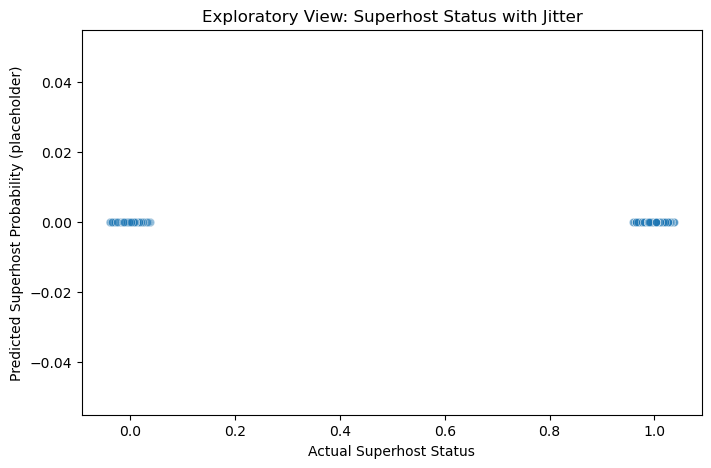

In [52]:
# Scatter plot with jitter for initial inspection
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=y_test + np.random.normal(0, 0.01, size=len(y_test)),  # jitter actual
    y=np.zeros_like(y_test),  # placeholder, shows clustering before prediction
    alpha=0.6
)
plt.xlabel('Actual Superhost Status')
plt.ylabel('Predicted Superhost Probability (placeholder)')
plt.title('Exploratory View: Superhost Status with Jitter')
plt.show()


#### Multiple Linear Regression Fit

I fit a linear regression model using multiple predictors. The scatter plot below shows the predicted probability of being a top host versus the actual binary status. 
A red dashed line represents perfect predictions (predicted = actual), allowing visual inspection of model performance.

In [39]:
# Prepare the features and target
# Keep only numeric predictors that might influence superhost status
features = [
    'total_reviews', 'rating_score', 'accuracy_score', 'cleanliness_score', 
    'checkin_score', 'communication_score', 'location_score', 'value_for_money_score',
    'host_number_of_listings', 'log_price', 'host_experience_years']

X_multi = df_airbnb[features].values
y_multi = df_airbnb['is_top_host'].values  # binary 0/1

In [40]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Step 10c: Run multiple linear regression
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

LinearRegression()

In [54]:
# Predict on test set
y_pred_multi = model_multi.predict(X_test)

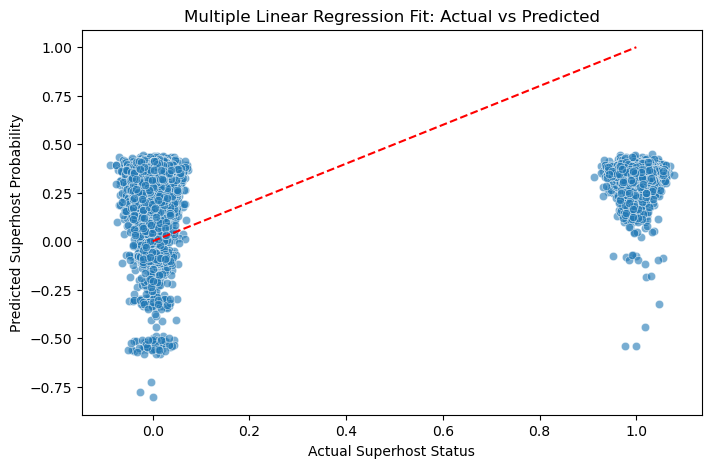

In [55]:
# Plot predicted vs actual with jitter
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=y_test + np.random.normal(0, 0.02, size=len(y_test)), 
    y=y_pred_multi + np.random.normal(0, 0.02, size=len(y_pred_multi)),
    alpha=0.6
)
plt.plot([0,1],[0,1], color='red', linestyle='--')  # reference line
plt.xlabel('Actual Superhost Status')
plt.ylabel('Predicted Superhost Probability')
plt.title('Multiple Linear Regression Fit: Actual vs Predicted')
plt.show()

In [56]:
# Performance metrics
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)
print(f"MSE: {mse_multi:.4f}")
print(f"R2 Score: {r2_multi:.4f}")

MSE: 0.2037
R2 Score: 0.0516


In [58]:
# Compare actual vs predicted in dataframe
comparison_multi = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multi})

In [60]:
comparison_multi.head()

,Actual,Predicted
0,0.0,0.281784
1,1.0,0.372745
2,0.0,0.277236
3,1.0,0.365923
4,1.0,0.365923


#### Interpretation of Multiple Linear Regression

The multiple linear regression model predicts the probability of a host being a top host using several features. 

**Observations:**
- The scatter plot shows predicted probabilities versus actual superhost status, with some spread around the ideal red dashed line.  
- Many points cluster near 0 or 1, reflecting the binary nature of the target variable.  
- The model captures some variation but does not perfectly separate superhosts from regular hosts.

**Performance Metrics:**
- **MSE:** 0.2037  
- **R² Score:** 0.0516  

These values indicate that the model explains only a small fraction of the variance in top host status. While adding multiple predictors slightly improved the MSE compared to the simple regression, the R² score remains low. 

**Actual vs Predicted Comparison:**
The comparison table shows that predicted values for superhosts are generally higher than non-superhosts, but the predictions are still far from binary 0/1 values. This suggests that the linear regression approach has limitations for this classification-like task.

**Reflections:**
- The low R² suggests that factors beyond the included features may influence whether a host becomes a top host.  
- Future approaches could explore logistic regression, decision trees, or ensemble models better suited for binary outcomes.  
- Data bias (e.g., more experienced hosts or city-specific effects) may also impact model performance.  

In summary, while the multiple linear regression provides some insight into feature influence on top host probability, the model's predictive power is limited and points toward the need for more suitable modeling approaches for this type of target variable.